In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-11-10 16:52:09--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-10 16:52:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-10 16:52:10--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape) # 50, 10000 -> 차원 = 주성분 : 50, 10000

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)

  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
      axs[i, j].axis('off')

  plt.show()

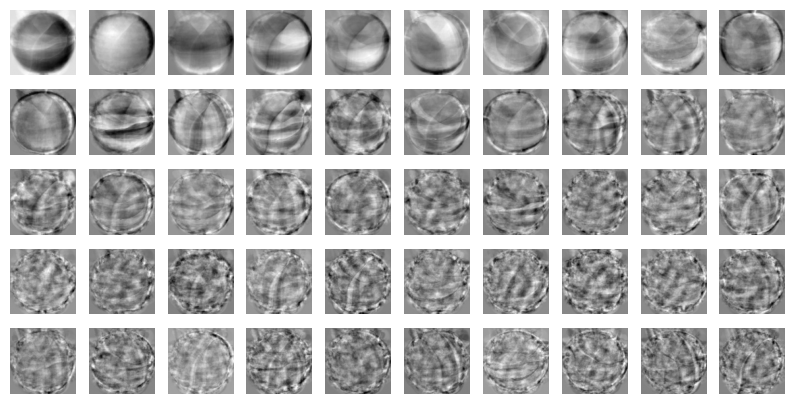

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 주성분을 그림으로 -> 데이터의 특징 잡아냄

In [9]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d) # 300, 100 -> 300, 50
print(fruits_pca.shape) # 차원 축소

(300, 10000)
(300, 50)


(300, 10000)


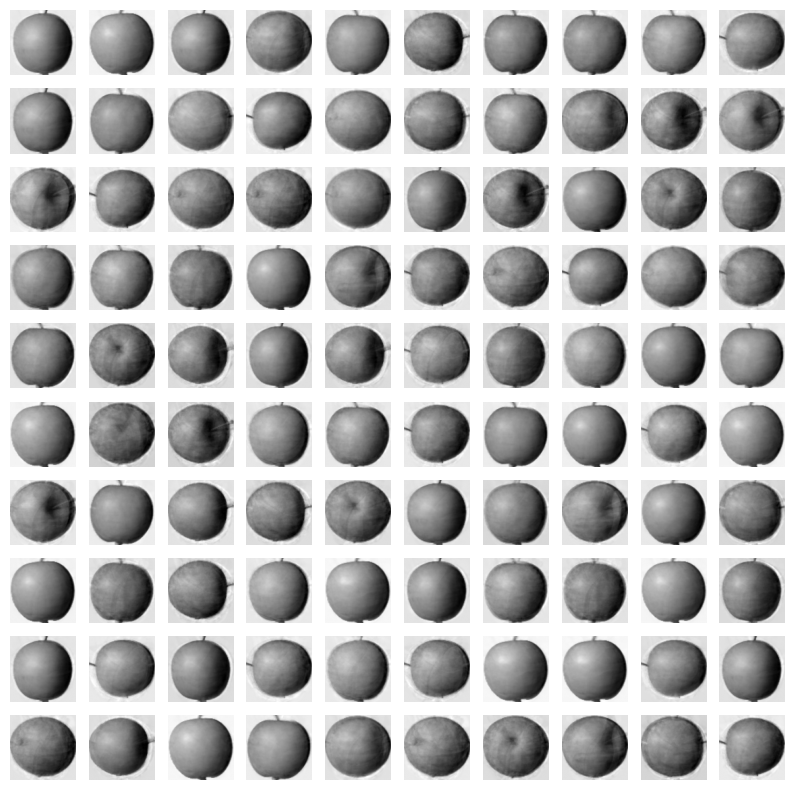

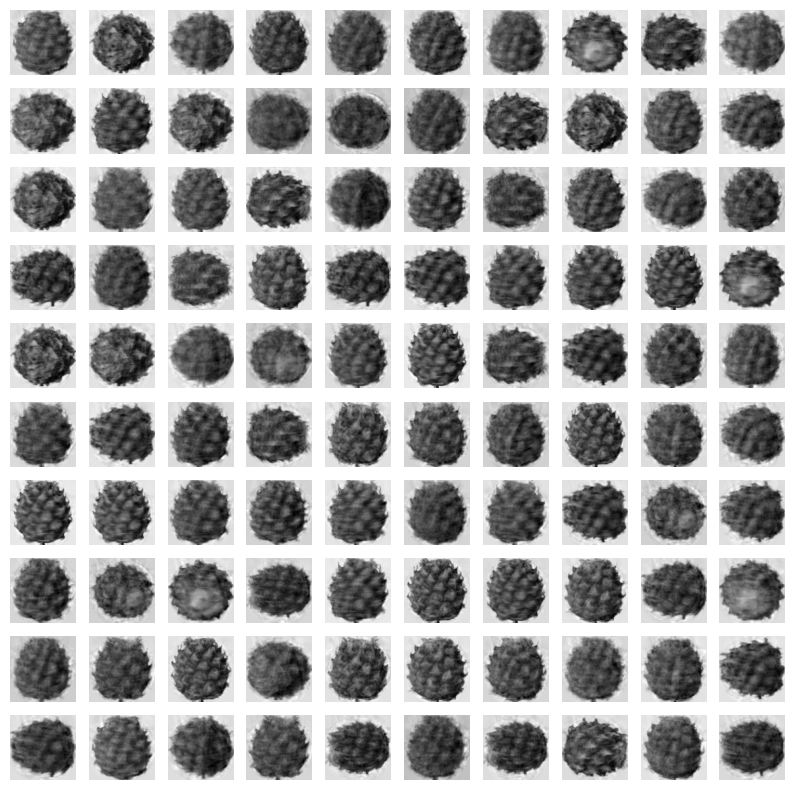

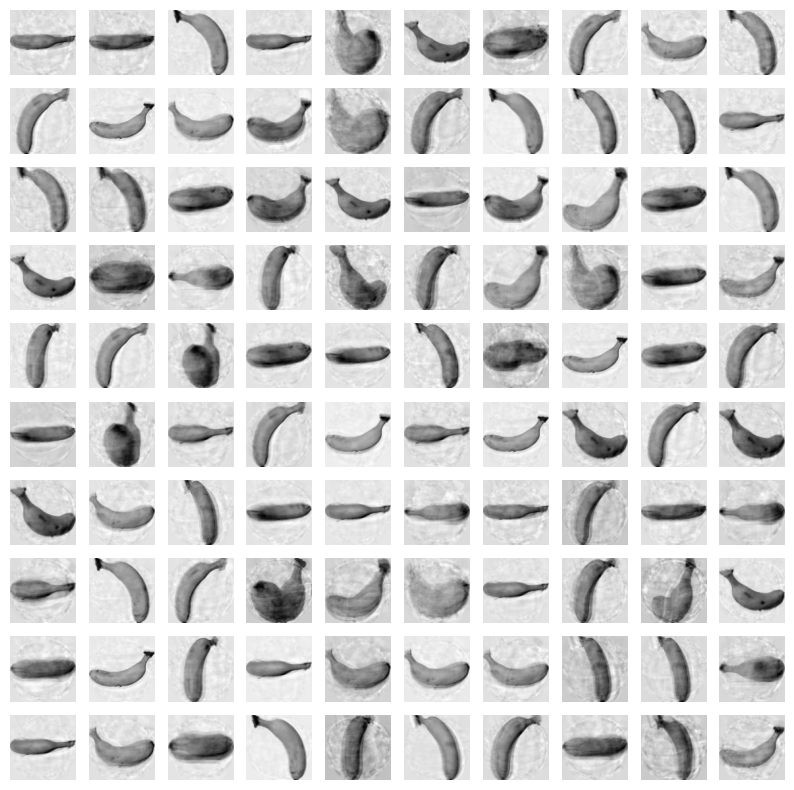

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 300, 50 -> 300, 10000
print(fruits_inverse.shape) # 원본 데이터 복원

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n") # 거의 모든 과일이 잘 복원됨 (조금 흐리고 번지긴 함)

0.9215670186579762


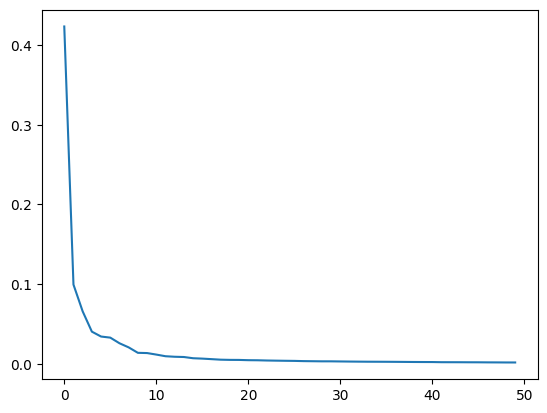

In [13]:
print(np.sum(pca.explained_variance_ratio_)) # 92%의 분산 유지 -> 복원 시 원본 이미지의 품질 높음

plt.plot(pca.explained_variance_ratio_)
plt.show() # 처음 10개의 분산이 대부분의 분산 표현

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 사과 : 0, 파인애플 : 1, 바나나 : 2

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 시간이 엄청나게 감소

0.9966666666666667
1.4661751747131349
0.9966666666666667
0.028788948059082033


In [19]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_) # 2개의 특성만으로 원본 데이터에 있는 분산의 50% 표현 가능

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # 특성 2개만 사용해도 99%의 정확도
print(np.mean(scores['fit_time']))

2
(300, 2)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.99
0.14588527679443358


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


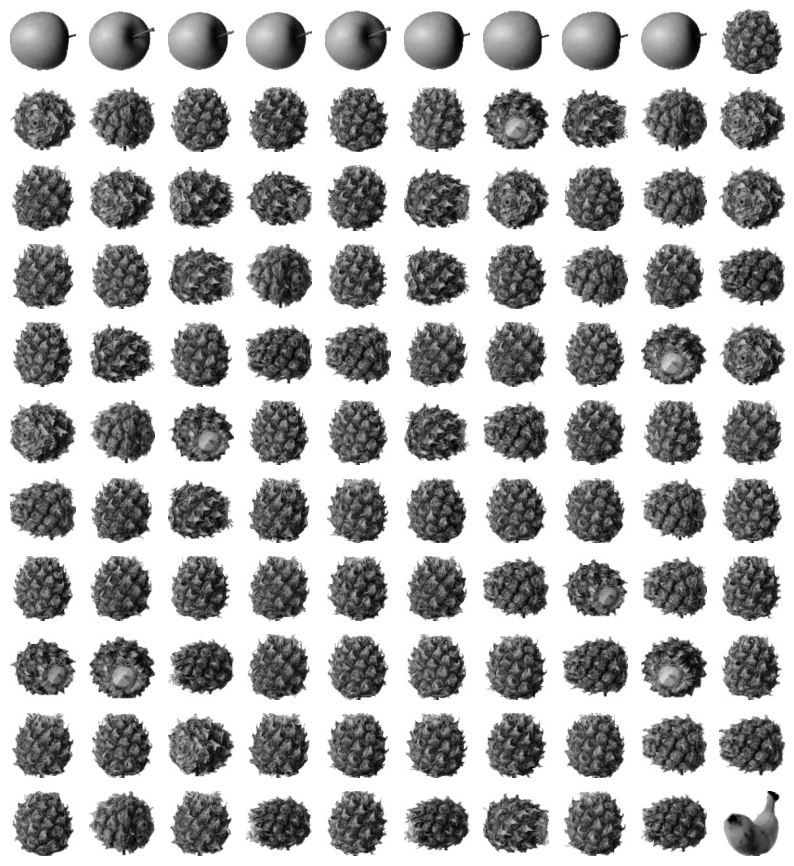

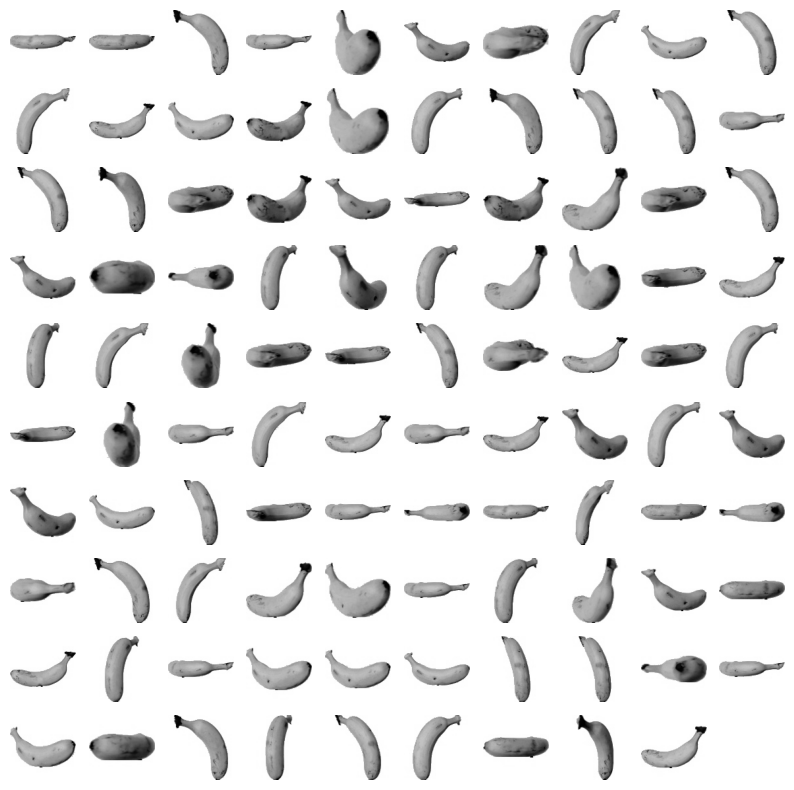

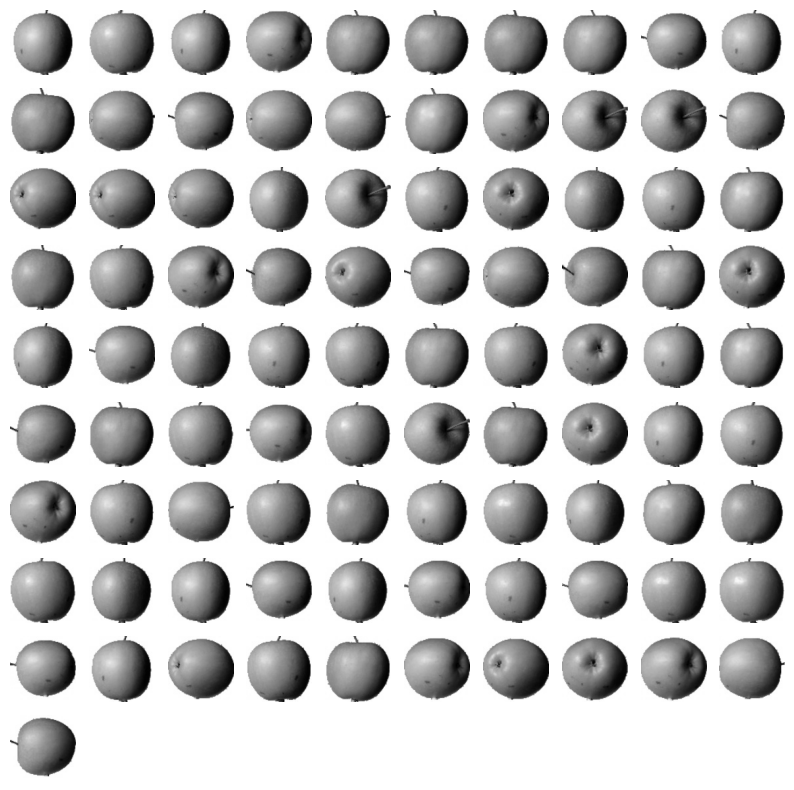

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

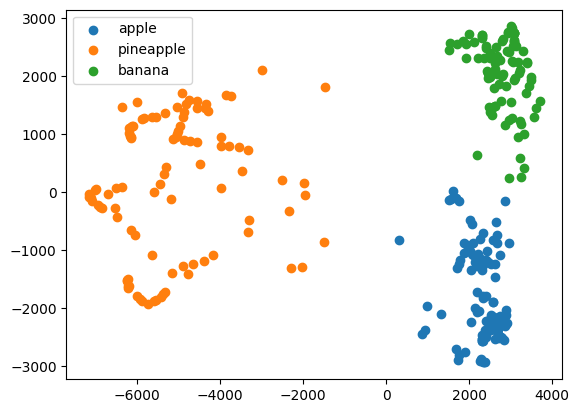

In [22]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])

plt.legend(['apple', 'pineapple', 'banana'])
plt.show() # 클러스터의 산점도로 볼 수 있음 -> 아주 잘 구분되어 있음